In [179]:
!pip install nltk

In [180]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [182]:
spam = pd.read_csv("messages.csv",encoding='latin-1')

In [183]:
spam.head(50)

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,0
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,0
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,0
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,0


In [184]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [185]:
spam.shape

(2893, 3)

In [186]:
spam.isnull().values.any()

True

In [187]:
spam.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [188]:
spam['label'].value_counts()

0    2412
1     481
Name: label, dtype: int64

In [189]:
spam['length'] = spam.message.str.len()
spam.head(10)

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,4492
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,0,2201
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,0,802
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,0,1230
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,0,1478


In [190]:
spam['message'] = spam['message'].str.lower()
spam['subject'] = spam['subject'].str.lower()
spam.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [191]:
spam['message'] = spam['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
spam['message'] = spam['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
spam['message'] = spam['message'].str.replace(r'£|\$', 'dollers')
spam['message'] = spam['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
spam['message'] = spam['message'].str.replace(r'\d+(\.\d+)?', 'numbr')
spam['message'] = spam['message'].str.replace(r'[^\w\d\s]', ' ')
spam['message'] = spam['message'].str.replace(r'\s+', ' ')
spam['message'] = spam['message'].str.replace(r'^\s+|\s+?$', '')

In [192]:
spam['subject'] = spam['subject'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
spam['subject'] = spam['subject'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
spam['subject'] = spam['subject'].str.replace(r'£|\$', 'dollers')
spam['subject'] = spam['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
spam['subject'] = spam['subject'].str.replace(r'\d+(\.\d+)?', 'numbr')
spam['subject'] = spam['subject'].str.replace(r'[^\w\d\s]', ' ')
spam['subject'] = spam['subject'].str.replace(r'\s+', ' ')
spam['subject'] = spam['subject'].str.replace(r'^\s+|\s+?$', '')

In [193]:
spam.head(50)

,subject,message,label,length
0,job posting apple iss research center,content length numbr apple iss research center...,0,2856
1,NaN,lang classification grimes joseph e and barbar...,0,1800
2,query letter frequencies for text identification,i am posting this inquiry for sergei atamas sa...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046
5,call for abstracts optimality in syntactic theory,content length numbr call for papers is the be...,0,4492
6,m a in scandinavian linguistics,m a in scandinavian linguistics at the univers...,0,2201
7,call for papers linguistics session of the m mla,call for papers linguistics session midwest mo...,0,802
8,foreign language in commercials,content length numbr greetings i m wondering i...,0,1230
9,fulbright announcement please post disseminate...,fulbright announcement please post disseminate...,0,1478


In [194]:
import re

In [195]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [196]:
ps = PorterStemmer()


In [197]:
corpus_msg = []
for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ',spam['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_msg.append(review)
    

In [198]:
#corpus_msg

In [199]:
corpus_sub=[]
for i in range(0, len(spam)):
    if type(spam['subject'][i]) == str:
        review = re.sub('[^a-zA-Z]', ' ',spam['subject'][i])
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        corpus_sub.append(review)
    else:
        corpus_sub.append(None)
#         print("null value index",i)

In [200]:
combined=list(zip(corpus_sub,corpus_msg,spam["label"]))
cleaned_df=pd.DataFrame(combined,columns=["Cleaned_subject","Cleaned_message","label"])
cleaned_df_new=cleaned_df.dropna(axis=0)
# cleaned_df.isnull().sum()
# cleaned_df_new

In [201]:
spam['clean_length'] = spam.message.str.len()
spam.head()

,subject,message,label,length,clean_length
0,job posting apple iss research center,content length numbr apple iss research center...,0,2856,2559
1,NaN,lang classification grimes joseph e and barbar...,0,1800,1689
2,query letter frequencies for text identification,i am posting this inquiry for sergei atamas sa...,0,1435,1356
3,risk,a colleague and i are researching the differin...,0,324,315
4,request book information,earlier this morning i was on the phone with a...,0,1046,955


In [202]:
print("Original Length:",spam.length.sum())
print("Cleaned Length:",spam.clean_length.sum())
print("Total Words Removed:",(spam.length.sum()) - (spam.clean_length.sum()))

Original Length: 9344743
Cleaned Length: 8578715
Total Words Removed: 766028


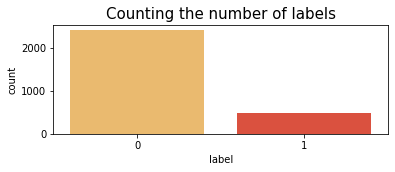

0    2412
1     481
Name: label, dtype: int64


In [203]:
plt.figure(figsize=(6,2))
sns.countplot(spam['label'],palette= 'YlOrRd')
plt.title("Counting the number of labels",fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

print(spam.label.value_counts())

In [204]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [205]:
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus_msg).toarray()

In [206]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [207]:
y=pd.get_dummies(spam['label'])
y=y.iloc[:,1]
y.shape

(2893,)

In [208]:
X.shape

(2893, 2500)

In [209]:
y.values

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [211]:
import os
from PIL import Image


#spams = spam['message'][spam['label']==1]

#spam_cloud = WordCloud(width=800,height=400,background_color='black',max_words=500).generate(' '.join(spams))

#plt.figure(figsize=(10,8),facecolor='b')
#plt.imshow(spam_cloud)
#plt.axis('off')
#plt.tight_layout(pad=0)
#plt.show()

In [212]:
#from wordcloud import WordCloud

#not_spams = spam['message'][spam['label']==0]

#spam_cloud = WordCloud(width=800,height=400,background_color='black',max_words=500).generate(' '.join(not_spams))

#plt.figure(figsize=(10,8),facecolor='b')
#plt.imshow(spam_cloud)
#plt.axis('off')
#plt.tight_layout(pad=0)
#plt.show()

In [213]:
#X.shape

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [215]:
X_train

array([[0, 0, 2, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [216]:
y_test.values

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [217]:
!pip install naive_bayes

In [275]:
from sklearn.naive_bayes import MultinomialNB
NB=MultinomialNB()
model=NB.fit(X_train,y_train)
y_pred=NB.fit(X_train,y_train).predict(X_test)


In [276]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [277]:
confusion_matrix(y_test,y_pred)

array([[470,   4],
       [  3, 102]])

In [278]:
Acc=accuracy_score(y_test,y_pred)

In [279]:
Acc

0.9879101899827288

# Chadura spam

In [280]:
c_tech=pd.read_csv("chadura_info_email.csv")

In [224]:
c_tech

,id,user_mail,category,status,subject,message
0,1,gnanavel@chadura.com,OTHER,WEB,Testing email delivery,Please work
1,2,gnanavel@chadura.com,OTHER,WEB,Testing email delivery,Testign agian without debug
2,3,gnanavel@chadura.com,OTHER,WEB,Testing email delivery,Testign agian without debug
3,4,romajpp1m4w@mail.ru,WEB,WEB,learn this here now Гидра онион,you could look here <a href=https://hydraruzxp...
4,5,ivanov-mikhail70526@mail.ru,WEB,WEB,Отзыв,О сайте отзывов о компаниях и работодателях «В...
...,...,...,...,...,...,...
800,801,evgeniiaoy91941@mail.ru,WEB,WEB,have a peek at this web-site pharmacyproduct,click now https://pharmacyproduct.space/per/1/...
801,802,lizshony@ppemovers.com,WEB,WEB,Why should you use shea butter?,<a href=https://skinmakeoverstore.com/what-is-...
802,803,bgrmbpumo@wowzilla.ru,WEB,WEB,rainbow riches casino,<a href=https://casinogamereal.online/>casino ...
803,804,colleenta3@akio41.inwebmail.fun,WEB,WEB,"Big Ass Photos - Free Huge Butt Porn, Big Boot...","Best Nude Playmates & Centerfolds, Beautiful g..."


In [225]:
c_tech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         805 non-null    int64 
 1   user_mail  805 non-null    object
 2   category   805 non-null    object
 3   status     805 non-null    object
 4   subject    805 non-null    object
 5   message    805 non-null    object
dtypes: int64(1), object(5)
memory usage: 37.9+ KB


In [226]:
c_tech.shape

(805, 6)

In [227]:

!pip3 install googletrans==3.1.0a0

In [228]:
from googletrans import Translator, constants
from pprint import pprint

In [229]:
from googletrans import Translator
translator = Translator()

In [230]:
!pip install translate
from translate import Translator

In [231]:
from googletrans import Translator, constants
from pprint import pprint
!pip3 install googletrans==3.1.0a0

In [232]:
translator = Translator()


In [233]:
c_tech["message_translated"] = c_tech['message'].apply(translator.translate, src='ru', dest='en').apply(getattr, args=('text',))

In [234]:
c_tech

,id,user_mail,category,status,subject,message,message_translated
0,1,gnanavel@chadura.com,OTHER,WEB,Testing email delivery,Please work,Please work
1,2,gnanavel@chadura.com,OTHER,WEB,Testing email delivery,Testign agian without debug,Testing again without debug
2,3,gnanavel@chadura.com,OTHER,WEB,Testing email delivery,Testign agian without debug,Testing again without debug
3,4,romajpp1m4w@mail.ru,WEB,WEB,learn this here now Гидра онион,you could look here <a href=https://hydraruzxp...,you could look here <a href=https://hydraruzxp...
4,5,ivanov-mikhail70526@mail.ru,WEB,WEB,Отзыв,О сайте отзывов о компаниях и работодателях «В...,About the website of reviews about companies a...
...,...,...,...,...,...,...,...
800,801,evgeniiaoy91941@mail.ru,WEB,WEB,have a peek at this web-site pharmacyproduct,click now https://pharmacyproduct.space/per/1/...,click now https://pharmacyproduct.space/per/1/...
801,802,lizshony@ppemovers.com,WEB,WEB,Why should you use shea butter?,<a href=https://skinmakeoverstore.com/what-is-...,<a href=https://skinmakeoverstore.com/what-is-...
802,803,bgrmbpumo@wowzilla.ru,WEB,WEB,rainbow riches casino,<a href=https://casinogamereal.online/>casino ...,<a href=https://casinogamereal.online/>casino ...
803,804,colleenta3@akio41.inwebmail.fun,WEB,WEB,"Big Ass Photos - Free Huge Butt Porn, Big Boot...","Best Nude Playmates & Centerfolds, Beautiful g...","Best Nude Playmates & Centerfolds, Beautiful g..."


In [235]:
c_tech1=c_tech.drop(['id','user_mail','category','status','message'],axis=1)
c_tech1.head(30)

,subject,message_translated
0,Testing email delivery,Please work
1,Testing email delivery,Testing again without debug
2,Testing email delivery,Testing again without debug
3,learn this here now Гидра онион,you could look here <a href=https://hydraruzxp...
4,Отзыв,About the website of reviews about companies a...
5,Единый сервис услуг Саранска,"Housekeeping, even in a small studio apartment..."
6,USA IT,Black market goods divert revenue from importa...
7,Вам будет по нраву этот источник,"<a href=""https://web-think.md/"">order site dev..."
8,helping the gypsies,helping the gypsies\r\n \r\n<a href=https://cr...
9,"Test, just a test",cjyfnefrins


In [236]:
c_tech1['length'] = c_tech1.message_translated.str.len()
c_tech1.head(10)

,subject,message_translated,length
0,Testing email delivery,Please work,11
1,Testing email delivery,Testing again without debug,27
2,Testing email delivery,Testing again without debug,27
3,learn this here now Гидра онион,you could look here <a href=https://hydraruzxp...,70
4,Отзыв,About the website of reviews about companies a...,1553
5,Единый сервис услуг Саранска,"Housekeeping, even in a small studio apartment...",301
6,USA IT,Black market goods divert revenue from importa...,149
7,Вам будет по нраву этот источник,"<a href=""https://web-think.md/"">order site dev...",58
8,helping the gypsies,helping the gypsies\r\n \r\n<a href=https://cr...,722
9,"Test, just a test",cjyfnefrins,11


In [237]:
c_tech1['message_translated'] = c_tech1['message_translated'].str.lower()
c_tech1['subject'] = c_tech1['subject'].str.lower()

In [238]:
c_tech1

,subject,message_translated,length
0,testing email delivery,please work,11
1,testing email delivery,testing again without debug,27
2,testing email delivery,testing again without debug,27
3,learn this here now гидра онион,you could look here <a href=https://hydraruzxp...,70
4,отзыв,about the website of reviews about companies a...,1553
...,...,...,...
800,have a peek at this web-site pharmacyproduct,click now https://pharmacyproduct.space/per/1/...,59
801,why should you use shea butter?,<a href=https://skinmakeoverstore.com/what-is-...,417
802,rainbow riches casino,<a href=https://casinogamereal.online/>casino ...,120
803,"big ass photos - free huge butt porn, big boot...","best nude playmates & centerfolds, beautiful g...",213


In [239]:
c_tech1['message_translated'] = c_tech1['message_translated'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
c_tech1['message_translated'] = c_tech1['message_translated'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
c_tech1['message_translated'] = c_tech1['message_translated'].str.replace(r'£|\$', 'dollers')
c_tech1['message_translated'] = c_tech1['message_translated'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
c_tech1['message_translated'] = c_tech1['message_translated'].str.replace(r'\d+(\.\d+)?', 'numbr')
c_tech1['message_translated'] = c_tech1['message_translated'].str.replace(r'[^\w\d\s]', ' ')
c_tech1['message_translated'] = c_tech1['message_translated'].str.replace(r'\s+', ' ')
c_tech1['message_translated'] = c_tech1['message_translated'].str.replace(r'^\s+|\s+?$', '')

In [240]:
c_tech1['subject'] = c_tech1['subject'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
c_tech1['subject'] = c_tech1['subject'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
c_tech1['subject'] = c_tech1['subject'].str.replace(r'£|\$', 'dollers')
c_tech1['subject'] = c_tech1['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
c_tech1['subject'] = c_tech1['subject'].str.replace(r'\d+(\.\d+)?', 'numbr')
c_tech1['subject'] = c_tech1['subject'].str.replace(r'[^\w\d\s]', ' ')
c_tech1['subject'] = c_tech1['subject'].str.replace(r'\s+', ' ')
c_tech1['subject'] = c_tech1['subject'].str.replace(r'^\s+|\s+?$', '')

In [241]:
c_tech1.head(50)

,subject,message_translated,length
0,testing email delivery,please work,11
1,testing email delivery,testing again without debug,27
2,testing email delivery,testing again without debug,27
3,learn this here now гидра онион,you could look here a href https hydraruzxpnew...,70
4,отзыв,about the website of reviews about companies a...,1553
5,единый сервис услуг саранска,housekeeping even in a small studio apartment ...,301
6,usa it,black market goods divert revenue from importa...,149
7,вам будет по нраву этот источник,a href https web think md order site developme...,58
8,helping the gypsies,helping the gypsies a href https cryptogipsy c...,722
9,test just a test,cjyfnefrins,11


In [242]:
import re

In [243]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [244]:
ps = PorterStemmer()
corpus_msg1 = []

In [245]:
for i in range(0, len(c_tech1)):
    review = re.sub('[^a-zA-Z]', ' ',c_tech1['message_translated'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_msg1.append(review)

In [246]:
#corpus_msg1

In [247]:
# corpus_sub1 = []

In [248]:
# for i in range(0, len(c_tech1)):
#     review = re.sub('[^a-zA-Z]', ' ',c_tech['subject'][i])
#     review = review.lower()
#     review = review.split()
#     review = [ps.stem(word) for word in review if not word in stopwords.words('english','rs')]
#     review = ' '.join(review)
#     corpus_sub1.append(review)

In [249]:
c_tech1['clean_length'] = c_tech1.message_translated.str.len()
c_tech1.head()

,subject,message_translated,length,clean_length
0,testing email delivery,please work,11,11
1,testing email delivery,testing again without debug,27,27
2,testing email delivery,testing again without debug,27,27
3,learn this here now гидра онион,you could look here a href https hydraruzxpnew...,70,68
4,отзыв,about the website of reviews about companies a...,1553,1491


In [250]:
from sklearn.feature_extraction.text import CountVectorizer
# corpus

In [251]:
cv1 = CountVectorizer(max_features=2500)
X1 = cv1.fit_transform(corpus_msg1).toarray()

In [252]:
X1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [253]:
y1=pd.get_dummies(c_tech1['message_translated'])
y1=y1.iloc[:,1]
y1.shape

(805,)

In [254]:
print(X1.shape)
print(y1.shape)

(805, 2500)
(805,)


In [255]:
from sklearn.model_selection import train_test_split
X_train_test_data, X_test_test_data, y_train_test_data, y_test_test_data= train_test_split(X1, y1, test_size = 0.20, random_state = 0)

In [256]:
print(X_test.shape)
print(X_test_test_data.shape)
X_train_test_data
X_test

(579, 2500)
(161, 2500)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [281]:
model

MultinomialNB()

In [282]:
spam_pred=model.predict(X_test_test_data)

In [283]:
accuracy_score(y_test_test_data,spam_pred)

0.7950310559006211

In [267]:
import joblib
import pickle

In [284]:
pickle.dump(model,open('spamtech.pkl','wb'))

In [285]:
pickle.dump(cv1,open('vectorizer.pkl','wb'))

In [286]:
sp=pickle.load(open('spamtech.pkl','rb'))
sp



MultinomialNB()

In [288]:
msg="you win 1000 dollar"
data=[msg]
vect=cv1.transform(data).toarray()
model1=model.predict(vect)
print(model1)

[0]


In [263]:
#from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
#def ps(messages):
   
   # ps = PorterStemmer()
   # corpus = []
    #review1 = messages.split(" ")

    #for i in review1:
        
    #    i = re.sub('[^a-zA-Z]', ' ', i)
    #    i = i.lower()
        
    #    if i not in stopwords.words('english'):
     #      corpus.append(i)

    #sentence=""
    #for i in corpus:
      
     # sentence=sentence+" "
      #sentence=sentence+str(i) 
        
    #return(sentence.strip())

In [264]:
# ps("I am a boy liht blue colour hair")

In [265]:
#def ps(messages):
    #"C:\Users\Admin\Downloads\MultinomialNaiveBayesModelVectorizer.pickle"
#    filename="/content/MultinomialNaiveBayesModelVectorizer.pickle"
 #   model_saved_ml=pickle.load( open(filename, "rb" ) )
    
  #  ps = PorterStemmer()
    #corpus = []
   # review1 = messages.split(" ")

    #for i in review1:
        
     #   i = re.sub('[^a-zA-Z]', ' ', i)
     #   i = i.lower()
        
      #  if i not in stopwords.words('english'):
       #    corpus.append(i)

    #sentence=""
    #for i in corpus:
      
     # sentence=sentence+" "
      #sentence=sentence+str(i) 

    #cv1 = CountVectorizer(max_features=2500)
    #X1 = cv1.fit_transform().toarray()
   # y1=pd.get_dummies(spamtech['message'])
    #X1
    
   
    #X_train_test_data, X_test_test_data, y_train_test_data, y_test_test_data= train_test_split(X1, y1, test_size = 0.20, random_state = 0)
    #final_pred = model_saved_ml.predict(X1)
    #print(final_pred)
#    return corpus

In [266]:
# ps("I am a boy liht blue colour hair")